**DATA**

- TBD

In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

data = pd.read_csv("data.csv")
print("raw data overview")
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(data.head())
    data.info()

raw data overview


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Correlation plots**

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


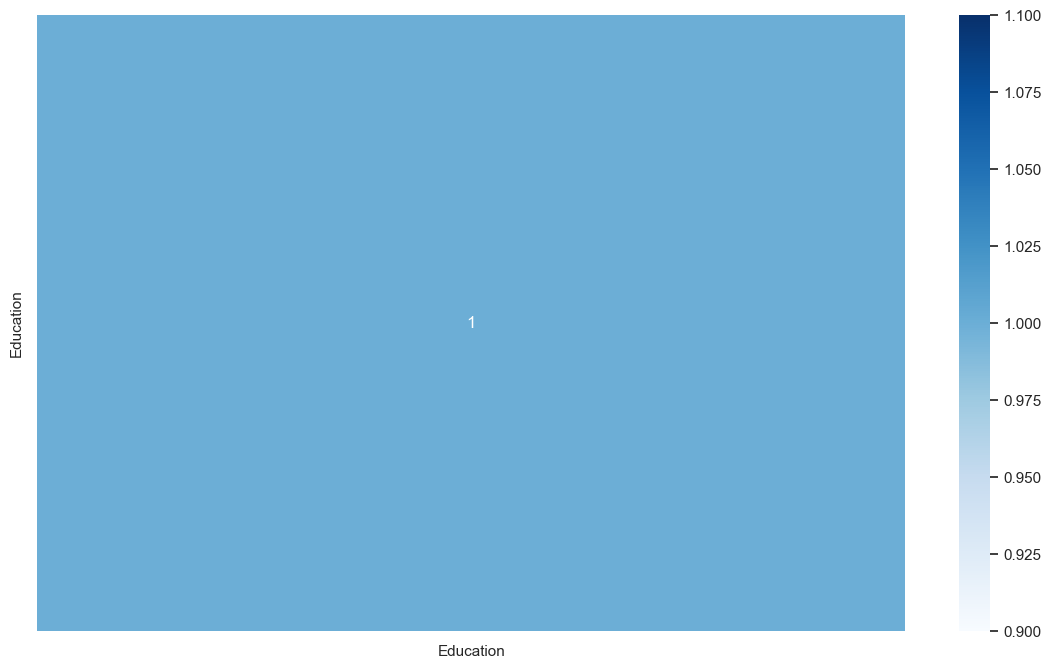

In [146]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.set_theme(style="white")


data['Attrition'] = data['Attrition'].map({'Yes':1, 'No': 0})

cols = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']


df_vals = data[['Education']]
corr = df_vals.corr()

# mask = np.abs(corr) < 0.2
# corr_mask = np.ma.masked_array(corr, mask)




heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')


In [ ]:
data.groupby(['Attrition']).head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


In [44]:
import tiktoken

processed_data = pd.read_csv("data.csv")

processed_data['BusinessTravel'] = processed_data['BusinessTravel'].map({'Travel_Frequently':1, 'Travel_Rarely': 0.5, 'Non-Travel': 0})

# print(data['Attrition'])
print(processed_data)

<module 'tensorflow' from 'c:\\Users\\samue\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\tensorflow\\__init__.py'>
      Age  Attrition  BusinessTravel  DailyRate              Department  \
0      41          1             0.5       1102                   Sales   
1      49          0             1.0        279  Research & Development   
2      37          1             0.5       1373  Research & Development   
3      33          0             1.0       1392  Research & Development   
4      27          0             0.5        591  Research & Development   
...   ...        ...             ...        ...                     ...   
1465   36          0             1.0        884  Research & Development   
1466   39          0             0.5        613  Research & Development   
1467   27          0             0.5        155  Research & Development   
1468   49          0             1.0       1023                   Sales   
1469   34          0             0.5   

**Tensorflow interpretation**

In [144]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

print("TensorFlow version:", tf.__version__)

data = pd.read_csv("data.csv")
data['Attrition'] = data['Attrition'].map({'Yes':1, 'No': 0})
data = data.drop(columns=['EmployeeNumber'])

#fix all text coloumns
non_number_colums = data.dtypes[data.dtypes == 'object'].index
#data = data.drop(columns=non_number_colums)

# Convert text columns to numeric using LabelEncoder
encoder = LabelEncoder()
for col in non_number_colums:
    data[col] = encoder.fit_transform(data[col])


#x and y
(y_train, x_train) = (data['Attrition'], data.drop(columns=['Attrition']))

# splitting data
length = len(data)
(x_test, y_test) = (x_train[length-200:length].to_numpy(), y_train[length-200:length].to_numpy())
(x_train, y_train) = (x_train[:length-200].to_numpy(), y_train[:length-200].to_numpy())

print(len(x_train),len(x_test))



#model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(len(data.columns) - 1, 1)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2)
])



predictions = model(x_train[:1]).numpy()

tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(y_train[:1], predictions).numpy()

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
print("loss, accuracy =>", model.evaluate(x_test,  y_test, verbose=2))

# probability_model = tf.keras.Sequential([
#   model,
#   tf.keras.layers.Softmax()
# ])

# probability_model(x_test[:200][1] > 0)

TensorFlow version: 2.13.0
1270 200
Epoch 1/5
40/40 [==============================] - 0s 506us/step - loss: 617.3555 - accuracy: 0.6213
Epoch 2/5
40/40 [==============================] - 0s 511us/step - loss: 397.7585 - accuracy: 0.7504
Epoch 3/5
40/40 [==============================] - 0s 460us/step - loss: 359.9941 - accuracy: 0.7441
Epoch 4/5
40/40 [==============================] - 0s 843us/step - loss: 312.6408 - accuracy: 0.7441
Epoch 5/5
40/40 [==============================] - 0s 460us/step - loss: 279.7977 - accuracy: 0.7480
7/7 - 0s - loss: 107.8379 - accuracy: 0.8550 - 49ms/epoch - 7ms/step
loss, accuracy => [107.83793640136719, 0.8550000190734863]
